In [57]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, FloatSlider, Checkbox
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from IPython.display import clear_output, display, HTML
%matplotlib notebook
mpl.style.use('ggplot')

In [89]:
def set_defaults():
    U = np.arange(1., 100, 1.)
    R = np.arange(1., 100, 1.) 
    T = np.arange(1., 100., 1.)
    return (U, R, T)

In [90]:
def treat_eff(R, T):
    eff = (1 - T/R)
    if isinstance(eff, float):
        return eff
    return np.ma.masked_where(eff<0, eff)
                           
def pot_load_inc(R, U):
    return (R / (R + U))

def score(R, T, U):
    return treat_eff(R, T) * pot_load_inc(R, U)


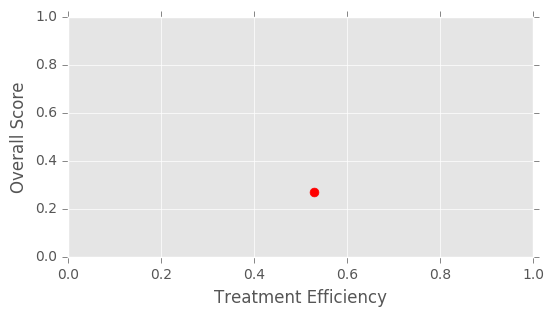

In [93]:
f, a = plt.subplots(1,1, figsize=(6,3))
a.set_xlabel('Treatment Efficiency')
a.set_ylabel('Overall Score')
U, R, T = set_defaults()
line, = a.plot(treat_eff(R, T), score(R, T, U))
dot = a.scatter([],[],color='r', s=40)
def mkplot(doR, doT, doU, R, T, U):
    _U, _R, _T = set_defaults()
    if doU:
        U = _U
    if doR:
        R = _R
    if doT:
        T = _T
    _eff = treat_eff(R, T)
    _score = score(R, T, U)
    if isinstance(_eff, float) and isinstance(_score, float):
        line.set_visible(False)
        dot.set_offsets([[_eff, _score]])
        dot.set_visible(True)
    else:
        dot.set_visible(False)
        line.set_visible(True)    
        line.set_xdata(treat_eff(R, T))
        line.set_ydata(score(R, T, U))
    a.set_xlim(0, 1)
    a.set_ylim(0, 1)
    display(f)

doR = Checkbox(description='Range of R', value=False)
doT = Checkbox(description='Range of T', value=False)
doU = Checkbox(description='Range of U', value=False)
valR = FloatSlider(value=20, min=0.0, max=100.0, step=1.0, description='R:')
valT = FloatSlider(value=10, min=0.0, max=100.0, step=1.0, description='T:')
valU = FloatSlider(value=50, min=0.0, max=100.0, step=1.0, description='U:')

def update_R(*args):
    if valR.value < valT.value:
        valR.value = valT.value
valT.observe(update_R, 'value')

def update_T(*args):
    if valT.value > valR.value:
        valT.value = valR.value
valR.observe(update_T, 'value')

interact(mkplot, doR=doR, doT=doT, doU=doU, R=valR, T=valT, U=valU)